In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

In [2]:
df_sp = pd.read_csv(r'F:\Abhilah_First\Results\Era5Land\noised_stake_data.csv')
df_sp.head()

,Unnamed: 0,Julian Day,obs_period(days),elevation(m),Derbis thickness (cm),melt (cm),pdd,Model-1 Melt Rate (cm/day),Model-2 Melt Rate (cm/day),Model-3 Melt Rate (cm/day)
0,0,232,17,3868.0,116.704707,10.789589,178.524402,0.960872,0.522011,0.543095
1,1,250,18,3867.0,113.487625,5.006354,152.118696,0.773263,0.420089,0.437056
2,2,263,13,3867.0,114.203133,4.979968,100.791271,0.709409,0.385399,0.400965
3,3,273,10,3868.0,116.584423,10.297328,72.470200,0.663096,0.360239,0.374789
4,4,298,25,3868.0,109.178897,0.539409,130.864899,0.478961,0.260204,0.270714


In [3]:
melt_rate = list(df_sp['melt (cm)']/df_sp['obs_period(days)'])
melt_model_1 = list(df_sp['pdd']*5.84*df_sp['Derbis thickness (cm)']**(-0.38)/df_sp['obs_period(days)']/10)
melt_model_2 = list(df_sp['pdd']*5.12/ (1 + (df_sp['Derbis thickness (cm)']/12.25)) /df_sp['obs_period(days)']/10)
melt_model_3 = list(df_sp['pdd']*6.82/ ((1 + (df_sp['Derbis thickness (cm)']/1.23) ** 2) **0.23) /df_sp['obs_period(days)']/ 10)
noised_db_thickness = list(df_sp['Derbis thickness (cm)'])

fhand = open("C:\\Users\\Abhilash Mittal\\Desktop\\All_T_data\\StakeData_ModelMelts.txt")
time_period = []
for line in fhand:
    time_period.append(float(line.split()[8]))

In [4]:
n = 1
periodic_total_melt_n = []
while n < 11:
    total_melt_1 = [] # melts of nth time period for each db band
    meltrate_n = []
    db_thickness_n = []
    obs_day = [10, 14, 13, 18, 16, 15, 17, 14, 14, 21]
    for mr, db, time in zip(melt_rate, noised_db_thickness, time_period):
        if time == n:
            meltrate_n.append(mr)
            db_thickness_n.append(db)
    melt_rate_db1 = []
    melt_rate_db2 = []
    melt_rate_db3 = []
    melt_rate_db4 = []
    melt_rate_db5 = []
    melt_rate_db6 = []
    melt_rate_db7 = []
    melt_rate_db8 = []
    melt_rate_db9 = []

    for i, j in zip(meltrate_n, db_thickness_n):
        if 0 < j < 5.0001:
            melt_rate_db1.append(i)

        elif 5 < j < 15.0001:
            melt_rate_db2.append(i)

        elif 15 < j < 25.0001:
            melt_rate_db3.append(i)

        elif 25 < j < 35.0001:
            melt_rate_db4.append(i)

        elif 35 < j < 45.0001:
            melt_rate_db5.append(i)

        elif 45 < j < 60.0001:
            melt_rate_db6.append(i)

        elif 60 < j < 75.0001:
            melt_rate_db7.append(i)

        elif 75 < j < 100.0001:
            melt_rate_db8.append(i)

        elif 100 < j < 120.0001:
            melt_rate_db9.append(i)
    area = 12.0096
    if len(melt_rate_db1) > 0:
        total_melt_1.append(sum(melt_rate_db1)/len(melt_rate_db1)*obs_day[n-1]*area*0.22811620162583887/100)
    if len(melt_rate_db2) > 0:
        total_melt_1.append(sum(melt_rate_db2)/len(melt_rate_db2)*obs_day[n-1]*area*0.28558041049247607/100)
    if len(melt_rate_db3) > 0:
        total_melt_1.append(sum(melt_rate_db3)/len(melt_rate_db3)*obs_day[n-1]*area*0.13087821700879687/100)
    if len(melt_rate_db4) > 0:
        total_melt_1.append(sum(melt_rate_db4)/len(melt_rate_db4)*obs_day[n-1]*area*0.10558937279127911/100)

    if len(melt_rate_db5) > 0:
        total_melt_1.append(sum(melt_rate_db5)/len(melt_rate_db5)*obs_day[n-1]*area*0.12350830293632936/100)

    if len(melt_rate_db6) > 0:
        total_melt_1.append(sum(melt_rate_db6)/len(melt_rate_db6)*obs_day[n-1]*area*0.0543555133000583/100)

    if len(melt_rate_db7) > 0:
        total_melt_1.append(sum(melt_rate_db7)/len(melt_rate_db7)*obs_day[n-1]*area*0.04154052330139432/100)

    if len(melt_rate_db8) > 0:
        total_melt_1.append(sum(melt_rate_db8)/len(melt_rate_db8)*obs_day[n-1]*area*0.024694405617078932/100)

    if len(melt_rate_db9) > 0:
        total_melt_1.append(sum(melt_rate_db9)/len(melt_rate_db9)*obs_day[n-1]*area*0.005737052926748187/100)

    periodic_total_melt_n.append(sum(total_melt_1))
    n = n + 1

m = 1
periodic_total_melt_m = []
while m < 11:
    total_melt_1 = [] # melts of nth time period for each db band
    meltrate_n = []
    db_thickness_n = []
    obs_day = [10, 14, 13, 18, 16, 15, 17, 14, 14, 21]
    for mr, db, time in zip(melt_model_1, noised_db_thickness, time_period):
        if time == m:
            meltrate_n.append(mr)
            db_thickness_n.append(db)
    melt_rate_db1 = []
    melt_rate_db2 = []
    melt_rate_db3 = []
    melt_rate_db4 = []
    melt_rate_db5 = []
    melt_rate_db6 = []
    melt_rate_db7 = []
    melt_rate_db8 = []
    melt_rate_db9 = []

    for i, j in zip(meltrate_n, db_thickness_n):
        if 0 < j < 5.0001:
            melt_rate_db1.append(i)

        elif 5 < j < 15.0001:
            melt_rate_db2.append(i)

        elif 15 < j < 25.0001:
            melt_rate_db3.append(i)

        elif 25 < j < 35.0001:
            melt_rate_db4.append(i)

        elif 35 < j < 45.0001:
            melt_rate_db5.append(i)

        elif 45 < j < 60.0001:
            melt_rate_db6.append(i)

        elif 60 < j < 75.0001:
            melt_rate_db7.append(i)

        elif 75 < j < 100.0001:
            melt_rate_db8.append(i)

        elif 100 < j < 120.0001:
            melt_rate_db9.append(i)
    area = 12.0096
    if len(melt_rate_db1) > 0:
        total_melt_1.append(sum(melt_rate_db1)/len(melt_rate_db1)*obs_day[m-1]*area*0.22811620162583887/100)
    if len(melt_rate_db2) > 0:
        total_melt_1.append(sum(melt_rate_db2)/len(melt_rate_db2)*obs_day[m-1]*area*0.28558041049247607/100)
    if len(melt_rate_db3) > 0:
        total_melt_1.append(sum(melt_rate_db3)/len(melt_rate_db3)*obs_day[m-1]*area*0.13087821700879687/100)
    if len(melt_rate_db4) > 0:
        total_melt_1.append(sum(melt_rate_db4)/len(melt_rate_db4)*obs_day[m-1]*area*0.10558937279127911/100)

    if len(melt_rate_db5) > 0:
        total_melt_1.append(sum(melt_rate_db5)/len(melt_rate_db5)*obs_day[m-1]*area*0.12350830293632936/100)

    if len(melt_rate_db6) > 0:
        total_melt_1.append(sum(melt_rate_db6)/len(melt_rate_db6)*obs_day[m-1]*area*0.0543555133000583/100)

    if len(melt_rate_db7) > 0:
        total_melt_1.append(sum(melt_rate_db7)/len(melt_rate_db7)*obs_day[m-1]*area*0.04154052330139432/100)

    if len(melt_rate_db8) > 0:
        total_melt_1.append(sum(melt_rate_db8)/len(melt_rate_db8)*obs_day[m-1]*area*0.024694405617078932/100)

    if len(melt_rate_db9) > 0:
        total_melt_1.append(sum(melt_rate_db9)/len(melt_rate_db9)*obs_day[m-1]*area*0.005737052926748187/100)

    periodic_total_melt_m.append(sum(total_melt_1))
    m = m + 1

o = 1
periodic_total_melt_o = []
while o < 11:
    total_melt_1 = [] # melts of nth time period for each db band
    meltrate_n = []
    db_thickness_n = []
    obs_day = [10, 14, 13, 18, 16, 15, 17, 14, 14, 21]
    for mr, db, time in zip(melt_model_2, noised_db_thickness, time_period):
        if time == o:
            meltrate_n.append(mr)
            db_thickness_n.append(db)
    melt_rate_db1 = []
    melt_rate_db2 = []
    melt_rate_db3 = []
    melt_rate_db4 = []
    melt_rate_db5 = []
    melt_rate_db6 = []
    melt_rate_db7 = []
    melt_rate_db8 = []
    melt_rate_db9 = []

    for i, j in zip(meltrate_n, db_thickness_n):
        if 0 < j < 5.0001:
            melt_rate_db1.append(i)

        elif 5 < j < 15.0001:
            melt_rate_db2.append(i)

        elif 15 < j < 25.0001:
            melt_rate_db3.append(i)

        elif 25 < j < 35.0001:
            melt_rate_db4.append(i)

        elif 35 < j < 45.0001:
            melt_rate_db5.append(i)

        elif 45 < j < 60.0001:
            melt_rate_db6.append(i)

        elif 60 < j < 75.0001:
            melt_rate_db7.append(i)

        elif 75 < j < 100.0001:
            melt_rate_db8.append(i)

        elif 100 < j < 120.0001:
            melt_rate_db9.append(i)
    area = 12.0096
    if len(melt_rate_db1) > 0:
        total_melt_1.append(sum(melt_rate_db1)/len(melt_rate_db1)*obs_day[o-1]*area*0.22811620162583887/100)
    if len(melt_rate_db2) > 0:
        total_melt_1.append(sum(melt_rate_db2)/len(melt_rate_db2)*obs_day[o-1]*area*0.28558041049247607/100)
    if len(melt_rate_db3) > 0:
        total_melt_1.append(sum(melt_rate_db3)/len(melt_rate_db3)*obs_day[o-1]*area*0.13087821700879687/100)
    if len(melt_rate_db4) > 0:
        total_melt_1.append(sum(melt_rate_db4)/len(melt_rate_db4)*obs_day[o-1]*area*0.10558937279127911/100)

    if len(melt_rate_db5) > 0:
        total_melt_1.append(sum(melt_rate_db5)/len(melt_rate_db5)*obs_day[o-1]*area*0.12350830293632936/100)

    if len(melt_rate_db6) > 0:
        total_melt_1.append(sum(melt_rate_db6)/len(melt_rate_db6)*obs_day[o-1]*area*0.0543555133000583/100)

    if len(melt_rate_db7) > 0:
        total_melt_1.append(sum(melt_rate_db7)/len(melt_rate_db7)*obs_day[o-1]*area*0.04154052330139432/100)

    if len(melt_rate_db8) > 0:
        total_melt_1.append(sum(melt_rate_db8)/len(melt_rate_db8)*obs_day[o-1]*area*0.024694405617078932/100)

    if len(melt_rate_db9) > 0:
        total_melt_1.append(sum(melt_rate_db9)/len(melt_rate_db9)*obs_day[o-1]*area*0.005737052926748187/100)

    periodic_total_melt_o.append(sum(total_melt_1))
    o = o + 1

p = 1
periodic_total_melt_p = []
while p < 11:
    total_melt_1 = [] # melts of nth time period for each db band
    meltrate_n = []
    db_thickness_n = []
    obs_day = [10, 14, 13, 18, 16, 15, 17, 14, 14, 21]
    for mr, db, time in zip(melt_model_3, noised_db_thickness, time_period):
        if time == p:
            meltrate_n.append(mr)
            db_thickness_n.append(db)
    melt_rate_db1 = []
    melt_rate_db2 = []
    melt_rate_db3 = []
    melt_rate_db4 = []
    melt_rate_db5 = []
    melt_rate_db6 = []
    melt_rate_db7 = []
    melt_rate_db8 = []
    melt_rate_db9 = []

    for i, j in zip(meltrate_n, db_thickness_n):
        if 0 < j < 5.0001:
            melt_rate_db1.append(i)

        elif 5 < j < 15.0001:
            melt_rate_db2.append(i)

        elif 15 < j < 25.0001:
            melt_rate_db3.append(i)

        elif 25 < j < 35.0001:
            melt_rate_db4.append(i)

        elif 35 < j < 45.0001:
            melt_rate_db5.append(i)

        elif 45 < j < 60.0001:
            melt_rate_db6.append(i)

        elif 60 < j < 75.0001:
            melt_rate_db7.append(i)

        elif 75 < j < 100.0001:
            melt_rate_db8.append(i)

        elif 100 < j < 120.0001:
            melt_rate_db9.append(i)
    area = 12.0096
    if len(melt_rate_db1) > 0:
        total_melt_1.append(sum(melt_rate_db1)/len(melt_rate_db1)*obs_day[p-1]*area*0.22811620162583887/100)
    if len(melt_rate_db2) > 0:
        total_melt_1.append(sum(melt_rate_db2)/len(melt_rate_db2)*obs_day[p-1]*area*0.28558041049247607/100)
    if len(melt_rate_db3) > 0:
        total_melt_1.append(sum(melt_rate_db3)/len(melt_rate_db3)*obs_day[p-1]*area*0.13087821700879687/100)
    if len(melt_rate_db4) > 0:
        total_melt_1.append(sum(melt_rate_db4)/len(melt_rate_db4)*obs_day[p-1]*area*0.10558937279127911/100)

    if len(melt_rate_db5) > 0:
        total_melt_1.append(sum(melt_rate_db5)/len(melt_rate_db5)*obs_day[p-1]*area*0.12350830293632936/100)

    if len(melt_rate_db6) > 0:
        total_melt_1.append(sum(melt_rate_db6)/len(melt_rate_db6)*obs_day[p-1]*area*0.0543555133000583/100)

    if len(melt_rate_db7) > 0:
        total_melt_1.append(sum(melt_rate_db7)/len(melt_rate_db7)*obs_day[p-1]*area*0.04154052330139432/100)

    if len(melt_rate_db8) > 0:
        total_melt_1.append(sum(melt_rate_db8)/len(melt_rate_db8)*obs_day[p-1]*area*0.024694405617078932/100)

    if len(melt_rate_db9) > 0:
        total_melt_1.append(sum(melt_rate_db9)/len(melt_rate_db9)*obs_day[p-1]*area*0.005737052926748187/100)

    periodic_total_melt_p.append(sum(total_melt_1))
    p = p + 1

In [5]:
jd1 = [155, 169, 182, 200, 216, 231, 248, 262, 276]
jd2 = [168, 181, 199, 215, 230, 247, 261, 275, 296]
df_total_melt = pd.DataFrame(jd1, columns=['Jd1'], index=list(range(2,11)))
df_total_melt['Jd2'] = jd2
df_total_melt['Observed Melt'] = periodic_total_melt_n[1:]
df_total_melt['Model 1'] = periodic_total_melt_m[1:]
df_total_melt['Model 2'] = periodic_total_melt_o[1:]
df_total_melt['Model 3'] = periodic_total_melt_p[1:]
df_total_melt.to_csv('F:\\Abhilah_First\\Results\\Era5Land\\Total_periodic_melt.csv')

Text(0, 0.5, 'Total melt (m^3 10^6)')

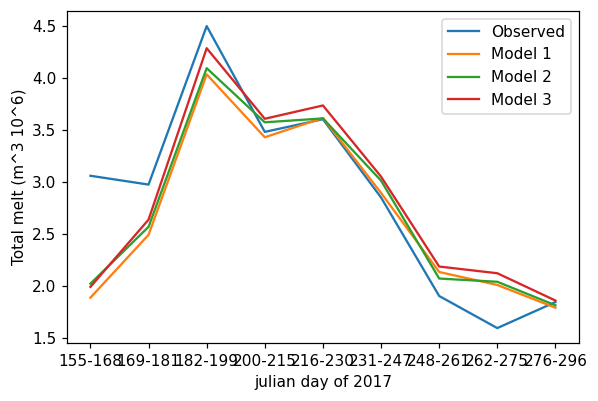

In [6]:
julian_day_intervals = []
for i, j in zip(df_total_melt['Jd1'], df_total_melt['Jd2']):
    julian_day_intervals.append(str(i) + '-' + str(j))
plt.rcParams['figure.dpi'] = 110
plt.plot(julian_day_intervals, df_total_melt['Observed Melt'], label ='Observed')
plt.plot(julian_day_intervals, df_total_melt['Model 1'],label ='Model 1')
plt.plot(julian_day_intervals, df_total_melt['Model 2'],label ='Model 2')
plt.plot(julian_day_intervals, df_total_melt['Model 3'],label ='Model 3')
plt.legend()
plt.xlabel('julian day of 2017')
plt.ylabel('Total melt (m^3 10^6)')